In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from ISLP.models import summarize

In [2]:
merged_data = pd.read_csv('team_project/data/processed/merged_data.csv')

print(merged_data.describe(include='all'))

print(merged_data.info())

       Province_x Month-Year  Unemployment Rate Minimum Wage
count        6391       6391        6391.000000         6086
unique         11        581                NaN          174
top        Canada   Jan-1976                NaN        $4.00
freq          581         11                NaN          395
mean          NaN        NaN           9.095634          NaN
std           NaN        NaN           3.503424          NaN
min           NaN        NaN           3.200000          NaN
25%           NaN        NaN           6.500000          NaN
50%           NaN        NaN           8.400000          NaN
75%           NaN        NaN          11.200000          NaN
max           NaN        NaN          22.700000          NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6391 entries, 0 to 6390
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Province_x         6391 non-null   object 
 1   Month-Year   

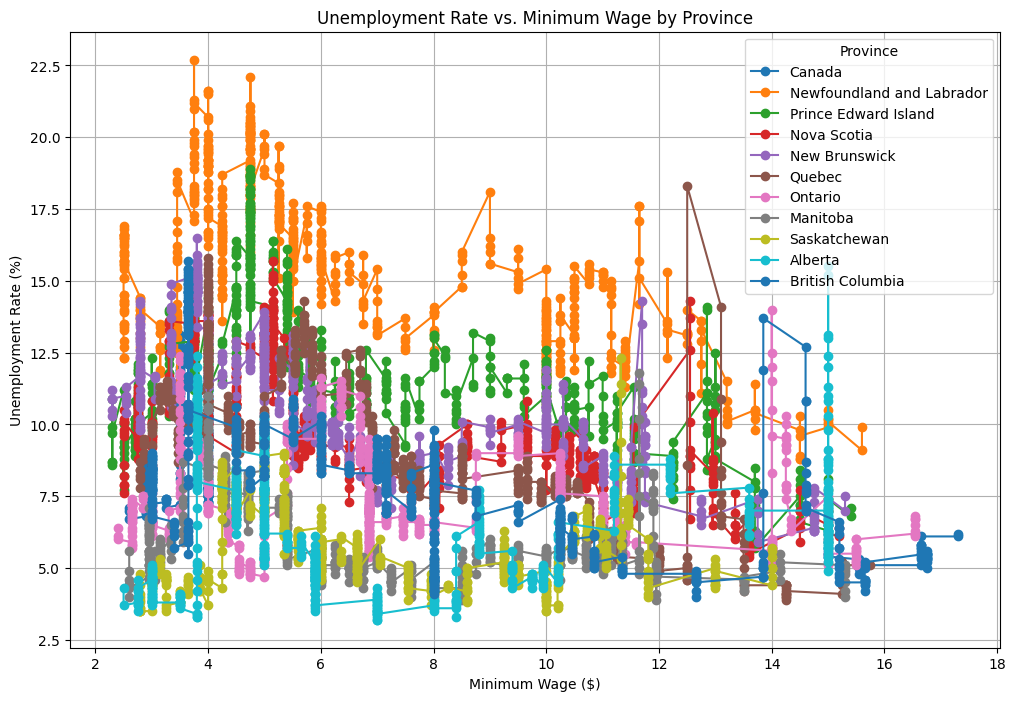

In [3]:
merged_data = pd.read_csv('team_project/data/processed/merged_data.csv')

#ensure datatype is correct
merged_data['Minimum Wage'] = merged_data['Minimum Wage'].replace('[\$,]', '', regex=True).astype(float)
merged_data['Unemployment Rate'] = merged_data['Unemployment Rate'].astype(float)

# lets see the plots first
plt.figure(figsize=(12, 8))
for province in merged_data['Province_x'].unique():
    province_data = merged_data[merged_data['Province_x'] == province]
    plt.plot(province_data['Minimum Wage'], province_data['Unemployment Rate'], marker='o', label=province)

plt.xlabel('Minimum Wage ($)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate vs. Minimum Wage by Province')
plt.legend(title='Province')
plt.grid(True)
plt.show()

#it's not very linear, let's test

In [9]:
#see if exists linear relationship b/w min wage and unemployment rate for each province
#Loop through each unique province

# I will drop Canada for now until will fill the NaN value

regression_summaries = {}

for province in merged_data['Province_x'].unique():
    if province != 'Canada':
        province_data = merged_data[merged_data['Province_x'] == province]
        
        X = province_data['Minimum Wage']
        y = province_data['Unemployment Rate']
        
        X = sm.add_constant(X)
        
        # Fit the linear regression model
        model = sm.OLS(y, X).fit()
        
        # Save the summary to the dictionary
        regression_summaries[province] = model.summary()
        print(summarize(model))


                 coef  std err       t  P>|t|
const         19.1033    0.197  96.844    0.0
Minimum Wage  -0.5275    0.026 -19.952    0.0
                 coef  std err       t  P>|t|
const         14.4442    0.196  73.561    0.0
Minimum Wage  -0.3696    0.026 -14.265    0.0
                 coef  std err       t  P>|t|
const         12.7686    0.153  83.654    0.0
Minimum Wage  -0.3963    0.020 -19.667    0.0
                 coef  std err        t  P>|t|
const         14.1931    0.140  101.048    0.0
Minimum Wage  -0.4930    0.019  -26.014    0.0
                 coef  std err       t  P>|t|
const         13.7121    0.166  82.391    0.0
Minimum Wage  -0.5989    0.021 -28.978    0.0
                coef  std err      t  P>|t|
const         7.8275    0.154  50.96  0.000
Minimum Wage -0.0571    0.018  -3.15  0.002
                coef  std err       t  P>|t|
const         7.6653    0.146  52.676    0.0
Minimum Wage -0.1967    0.019 -10.355    0.0
                coef  std err       t  P

In [10]:
# Print regression summaries
for province, summary in regression_summaries.items():
    print(f'Regression summary for {province}:')
    print(summary)

Regression summary for Newfoundland and Labrador:
                            OLS Regression Results                            
Dep. Variable:      Unemployment Rate   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     398.1
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           8.37e-68
Time:                        23:08:12   Log-Likelihood:                -1258.1
No. Observations:                 581   AIC:                             2520.
Df Residuals:                     579   BIC:                             2529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------